## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [1]:
'''# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)'''

'# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work\ninput_layer = Input(shape=(n,))\nembedding = Embedding(no_1, no_2, input_length=n)(input_layer)\nflatten = Flatten()(embedding)'

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [0]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path='/content/drive/My Drive/Copy_of_train_data.csv'
project_data = pd.read_csv(path)

In [0]:
path='/content/drive/My Drive/Copy_of_resources.csv'
resource_data = pd.read_csv(path)

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
def num_there(s):
    return any(i.isdigit() for i in str(s))

In [0]:
isnum=[]
for i in range(0,project_data.shape[0]):
    isnum.append(int(num_there(project_data['project_resource_summary'][i])))

In [0]:
project_data['isnum']=isnum

## Preprocessing the data

In [13]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

In [0]:
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()

In [15]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [16]:
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 3


>number of missing values are very less in number, we can replace it with Mrs. as most of the projects are submitted by Mrs.

In [0]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [18]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

>Remove '.' <br>
>convert all the chars to small

In [0]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()

In [0]:
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()

In [0]:
project_data['school_state'] = project_data['school_state'].str.lower()

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [25]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 109248/109248 [00:02<00:00, 49234.03it/s]


In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [27]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|██████████| 109248/109248 [00:52<00:00, 2085.28it/s]


In [0]:
project_data['essay']=preprocessed_essays

In [0]:
project_data['project_title']=preprocessed_titles

In [30]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'isnum', 'essay'],
      dtype='object')

In [31]:
project_data.shape

(109248, 21)

In [0]:
X=project_data[['teacher_prefix', 'school_state', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories', 'teacher_number_of_previously_posted_projects', 'price', 'quantity', 'isnum', 'essay']]

In [0]:
y=project_data.iloc[:,-5]

In [0]:
from numpy import asarray
def get_glove():
  embeddings_index = dict()
  f = open('/content/drive/My Drive/lstmasgn/glove.6B.300d.txt')
  for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
  f.close()
  return embeddings_index

In [36]:
embeddings_index=get_glove()

400000it [00:38, 10383.59it/s]


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train,X_cv,y_train,y_cv=train_test_split(X_train, y_train, test_size=0.2)

In [42]:
from sklearn.preprocessing import StandardScaler
import numpy as np
price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

Mean : 296.5884117108613, Standard deviation : 355.66036877695643


In [0]:
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

In [44]:
ppp_scalar = StandardScaler()
ppp_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {ppp_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppp_scalar.var_[0])}")

Mean : 11.059669899024572, Standard deviation : 27.307587855562726


In [0]:
ppp_standardized_train = ppp_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
ppp_standardized_cv = ppp_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
ppp_standardized_test = ppp_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [46]:
qty_scalar = StandardScaler()
qty_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {qty_scalar.mean_[0]}, Standard deviation : {np.sqrt(qty_scalar.var_[0])}")

Mean : 17.016576561114448, Standard deviation : 26.74977995835986


In [0]:
qty_standardized_train = qty_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
qty_standardized_cv = qty_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
qty_standardized_test = qty_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

In [48]:
isnum_scalar = StandardScaler()
isnum_scalar.fit(X_train['isnum'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {isnum_scalar.mean_[0]}, Standard deviation : {np.sqrt(isnum_scalar.var_[0])}")

Mean : 0.14438342057839182, Standard deviation : 0.3514780909821763


In [0]:
isnum_standardized_train = isnum_scalar.transform(X_train['isnum'].values.reshape(-1, 1))
isnum_standardized_cv = isnum_scalar.transform(X_cv['isnum'].values.reshape(-1, 1))
isnum_standardized_test = isnum_scalar.transform(X_test['isnum'].values.reshape(-1, 1))

In [50]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
t=Tokenizer()
t.fit_on_texts(X_train['essay'].values)

X_train_encoded_docs = t.texts_to_sequences(X_train['essay'].values)
X_cv_encoded_docs = t.texts_to_sequences(X_cv['essay'].values)
X_test_encoded_docs = t.texts_to_sequences(X_test['essay'].values)

X_train_padded_docs = pad_sequences(X_train_encoded_docs, maxlen=300, padding='post')
X_cv_padded_docs = pad_sequences(X_cv_encoded_docs, maxlen=300, padding='post')
X_test_padded_docs = pad_sequences(X_test_encoded_docs, maxlen=300, padding='post')

In [0]:
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [0]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [0]:
from sklearn.preprocessing import LabelEncoder
vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['teacher_prefix'].values)
X_train_tp_le = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_tp_le = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_tp_le = vectorizer.transform(X_test['teacher_prefix'].values)

vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['school_state'].values)
X_train_ss_le = vectorizer.transform(X_train['school_state'].values)
X_cv_ss_le = vectorizer.transform(X_cv['school_state'].values)
X_test_ss_le = vectorizer.transform(X_test['school_state'].values)

vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['project_grade_category'].values)
X_train_pgc_le = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_pgc_le = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_pgc_le = vectorizer.transform(X_test['project_grade_category'].values)

vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['project_subject_categories'].values)
X_train_psc_le = vectorizer.transform(X_train['project_subject_categories'].values)
X_cv_psc_le = vectorizer.transform(X_cv['project_subject_categories'].values)
X_test_psc_le = vectorizer.transform(X_test['project_subject_categories'].values)

vectorizer = LabelEncoderExt()
vectorizer.fit(X_train['project_subject_subcategories'].values)
X_train_pss_le = vectorizer.transform(X_train['project_subject_subcategories'].values)
X_cv_pss_le = vectorizer.transform(X_cv['project_subject_subcategories'].values)
X_test_pss_le = vectorizer.transform(X_test['project_subject_subcategories'].values)

In [0]:
from keras.utils import to_categorical
X_train_tp_le=to_categorical(X_train_tp_le)
X_cv_tp_le=to_categorical(X_cv_tp_le)
X_test_tp_le=to_categorical(X_test_tp_le)

X_train_ss_le=to_categorical(X_train_ss_le)
X_cv_ss_le=to_categorical(X_cv_ss_le)
X_test_ss_le=to_categorical(X_test_ss_le)

X_train_pgc_le=to_categorical(X_train_pgc_le)
X_cv_pgc_le=to_categorical(X_cv_pgc_le)
X_test_pgc_le=to_categorical(X_test_pgc_le)

X_train_psc_le=to_categorical(X_train_psc_le)
X_cv_psc_le=to_categorical(X_cv_psc_le)
X_test_psc_le=to_categorical(X_test_psc_le)

X_train_pss_le=to_categorical(X_train_pss_le)
X_cv_pss_le=to_categorical(X_cv_pss_le)
X_test_pss_le=to_categorical(X_test_pss_le)

In [0]:
y_train=to_categorical(y_train)
y_cv=to_categorical(y_cv)
y_test=to_categorical(y_test)

In [0]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:
nf_train=np.hstack([ppp_standardized_train,isnum_standardized_train,price_standardized_train,qty_standardized_train])
nf_cv=np.hstack([ppp_standardized_cv,isnum_standardized_cv,price_standardized_cv,qty_standardized_cv])
nf_test=np.hstack([ppp_standardized_test,isnum_standardized_test,price_standardized_test,qty_standardized_test])

In [81]:
from keras.layers import Input, Embedding, LSTM, Dense,Flatten,Concatenate,Dropout,CuDNNLSTM,BatchNormalization,SpatialDropout1D,concatenate
from keras.models import Model
import keras
from keras import regularizers
from keras.regularizers import *
from keras.optimizers import *
from keras.initializers import he_normal,glorot_normal
from tensorflow.python.keras.callbacks import TensorBoard



total_text_data=Input(shape=(len(X_train_padded_docs[0]),), name='total_text_data')
input_school_state=Input(shape=(X_train_ss_le.shape[1],), name='input_school_state')
project_grade_category=Input(shape=(X_train_pgc_le.shape[1],), name='project_grade_category')
input_clean_categories=Input(shape=(X_train_psc_le.shape[1],), name='input_clean_categories')
input_clean_subcategories=Input(shape=(X_train_pss_le.shape[1],), name='input_clean_subcategories')
input_teacher_prefix=Input(shape=(X_train_tp_le.shape[1],), name='input_teacher_prefix')
input_numerical_features=Input(shape=(4,), name='input_numerical_features')


emb_text_data=Embedding(vocab_size,300,weights=[embedding_matrix],input_length=len(X_train_padded_docs[0]),trainable=False)(total_text_data)
emb_text_data=CuDNNLSTM(64,return_sequences=True)(emb_text_data)
emb_state_data=Embedding(X_train_ss_le.shape[1],64,input_length=X_train_ss_le.shape[1],trainable=True)(input_school_state)
emb_pgc_data=Embedding(X_train_pgc_le.shape[1],64,input_length=X_train_pgc_le.shape[1],trainable=True)(project_grade_category)
emb_clean_categories_data=Embedding(X_train_psc_le.shape[1],64,input_length=X_train_psc_le.shape[1],trainable=True)(input_clean_categories)
emb_clean_subcategories_data=Embedding(X_train_pss_le.shape[1],64,input_length=X_train_pss_le.shape[1],trainable=True)(input_clean_subcategories)
emb_teacher_prefix_data=Embedding(X_train_tp_le.shape[1],64,input_length=X_train_tp_le.shape[1],trainable=True)(input_teacher_prefix)


dense_for_rem_input=Dense(input_dim=4,output_dim=64)(input_numerical_features)

flatten=Flatten()(emb_text_data)
flatten_1=Flatten()(emb_state_data)
flatten_2=Flatten()(emb_pgc_data)
flatten_3=Flatten()(emb_clean_categories_data)
flatten_4=Flatten()(emb_clean_subcategories_data)
flatten_5=Flatten()(emb_teacher_prefix_data)


concat=concatenate([flatten,flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,dense_for_rem_input])

dense_layer1_after_concat=Dense(64,activation='relu',name='d1')(concat)
bn=BatchNormalization()(dense_layer1_after_concat)
dropout=Dropout(0.5)(bn)
dense_layer2_after_concat=Dense(32,activation='relu',name='d2')(dropout)
bn1=BatchNormalization()(dense_layer2_after_concat)
dropout1=Dropout(0.5)(bn1)
dense_layern_after_concat=Dense(16,activation='relu',name='dn')(dropout1)
bn2=BatchNormalization()(dense_layern_after_concat)
dropout2=Dropout(0.5)(bn2)

output_layer_to_classify_with_soft_max=Dense(2,activation='softmax',name='output')(dropout2)

model_1=Model(inputs=[total_text_data,input_school_state,project_grade_category,input_clean_categories,input_clean_subcategories,input_teacher_prefix,input_numerical_features],outputs=output_layer_to_classify_with_soft_max)

model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',auroc])

model_1.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, units=64)`


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
total_text_data (InputLayer)    (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 300, 300)     14233800    total_text_data[0][0]            
__________________________________________________________________________________________________
input_school_state (InputLayer) (None, 52)           0                                            
__________________________________________________________________________________________________
project_grade_category (InputLa (None, 5)            0                                            
____________________________________________________________________________________________

In [82]:
from tensorboardcolab import *
from keras.callbacks import EarlyStopping,ModelCheckpoint
tbc=TensorBoardColab()
filepath='weights_copy.best1.hdf5'
checkpoint_1 = ModelCheckpoint(filepath, monitor='val_auroc', verbose=1, save_best_only=True, mode='max')
cbl1 = [checkpoint_1,TensorBoardColabCallback(tbc)]
model_1.fit([X_train_padded_docs,X_train_ss_le,X_train_pgc_le,X_train_psc_le,X_train_pss_le,X_train_tp_le,nf_train],y_train,epochs=20,batch_size=1000,validation_data=([X_cv_padded_docs,X_cv_ss_le,X_cv_pgc_le,X_cv_psc_le,X_cv_pss_le,X_cv_tp_le,nf_cv],y_cv),verbose=1,callbacks=cbl1,class_weight = 'balanced')

Wait for 8 seconds...
TensorBoard link:
http://ef9fefe3.ngrok.io
Train on 69918 samples, validate on 17480 samples
Epoch 1/20
69918/69918 [==============================] - 14s 197us/step - loss: 0.8028 - acc: 0.6428 - auroc: 0.5295 - val_loss: 0.6247 - val_acc: 0.8364 - val_auroc: 0.4908

Epoch 00001: val_auroc improved from -inf to 0.49076, saving model to weights_copy.best1.hdf5
Epoch 2/20
69918/69918 [==============================] - 13s 184us/step - loss: 0.6027 - acc: 0.7811 - auroc: 0.5463 - val_loss: 0.5106 - val_acc: 0.8420 - val_auroc: 0.5368

Epoch 00002: val_auroc improved from 0.49076 to 0.53684, saving model to weights_copy.best1.hdf5
Epoch 3/20
69918/69918 [==============================] - 13s 185us/step - loss: 0.5179 - acc: 0.8298 - auroc: 0.5574 - val_loss: 0.4808 - val_acc: 0.8417 - val_auroc: 0.6582

Epoch 00003: val_auroc improved from 0.53684 to 0.65818, saving model to weights_copy.best1.hdf5
Epoch 4/20
69918/69918 [==============================] - 13s 185us/s

In [0]:
model_1.load_weights('weights_copy.best1.hdf5')

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

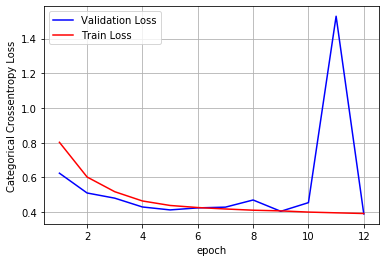

In [86]:
vy = model_1.history.history['val_loss'][0:12]
ty = model_1.history.history['loss'][0:12]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,12+1))
plt_dynamic(x, vy, ty, ax)

In [0]:
def plt_dynamic1(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation AUC")
    ax.plot(x, ty, 'r', label="Train AUC")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

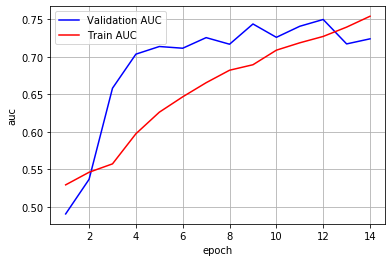

In [89]:
vy = model_1.history.history['val_auroc'][0:14]
ty = model_1.history.history['auroc'][0:14]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('auc')
# list of epoch numbers
x = list(range(1,14+1))
plt_dynamic1(x, vy, ty, ax)

In [90]:
result=model_1.evaluate([X_test_padded_docs,X_test_ss_le,X_test_pgc_le,X_test_psc_le,X_test_pss_le,X_test_tp_le,nf_test],y_test,batch_size=100)

21850/21850 [==============================] - 3s 158us/step


In [91]:
result

[0.38731387366692044, 0.854004572949093, 0.7333653125502343]

In [92]:
model_1.metrics_names

['loss', 'acc', 'auroc']

In [93]:
print('test',model_1.metrics_names[0],'is',result[0])
print('test',model_1.metrics_names[1],'is',result[1])
print('test',model_1.metrics_names[2],'is',result[2])

test loss is 0.38731387366692044
test acc is 0.854004572949093
test auroc is 0.7333653125502343


<img src='https://i.imgur.com/r6qVS3L.png'>
ref: https://i.imgur.com/r6qVS3L.png

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv=TfidfVectorizer()
tfv.fit(X_train['essay'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
idfv=tfv.idf_

Text(0, 0.5, 'idf')

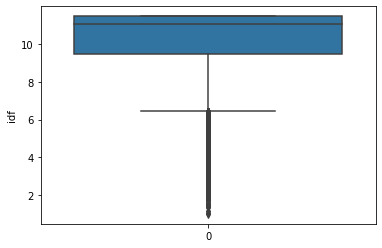

In [98]:
import seaborn as sns
sns.boxplot(data = pd.DataFrame(idfv))
plt.ylabel('idf')

In [99]:
for i in range(0,100,25):
    var =idfv
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 1.0076234872863457
25 percentile value is 9.447042507065435
50 percentile value is 11.056480419499536
75 percentile value is 11.4619455276077
100 percentile value is  11.4619455276077


Only choose words with idf between 9.447042507065435 and 11.4619455276077

In [103]:
idfw=[]
for i,word in enumerate(tfv.get_feature_names()):
  if (idfv[i]>=9.447042507065435 and idfv[i]<=11.4619455276077):
    idfw.append(word)
print(len(idfw))

35749


In [104]:
%%time
xtreidf=['' for i in range(X_train.shape[0])]
for i in range(X_train.shape[0]):
  for j,jw in enumerate(X_train['essay'].values[i].split()):
    if (jw in idfw):
      xtreidf[i]+=jw+' '     

CPU times: user 1h 47min 59s, sys: 0 ns, total: 1h 47min 59s
Wall time: 1h 48min 6s


In [105]:
%%time
xcveidf=['' for i in range(X_cv.shape[0])]
for i in range(X_cv.shape[0]):
  for j,jw in enumerate(X_cv['essay'].values[i].split()):
    if (jw in idfw):      
      xcveidf[i]+=jw+' '      

CPU times: user 26min 20s, sys: 0 ns, total: 26min 20s
Wall time: 26min 23s


In [106]:
%%time
xteeidf=['' for i in range(X_test.shape[0])]
for i in range(X_test.shape[0]):
  for j,jw in enumerate(X_test['essay'].values[i].split()):
    if (jw in idfw):      
      xteeidf[i]+=jw+' '

CPU times: user 33min 18s, sys: 352 ms, total: 33min 18s
Wall time: 33min 22s


In [0]:
t1=Tokenizer()
t1.fit_on_texts(xtreidf)
X_train_encoded_docs = t1.texts_to_sequences(xtreidf)
X_cv_encoded_docs = t1.texts_to_sequences(xcveidf)
X_test_encoded_docs = t1.texts_to_sequences(xteeidf)

X_train_padded_docs = pad_sequences(X_train_encoded_docs, maxlen=300, padding='post')
X_cv_padded_docs = pad_sequences(X_cv_encoded_docs, maxlen=300, padding='post')
X_test_padded_docs = pad_sequences(X_test_encoded_docs, maxlen=300, padding='post')

In [0]:
vocab_size = len(t1.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t1.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [116]:
total_text_data=Input(shape=(len(X_train_padded_docs[0]),), name='total_text_data')
emb_text_data=Embedding(vocab_size,300,weights=[embedding_matrix],input_length=len(X_train_padded_docs[0]),trainable=False)(total_text_data)
emb_text_data=LSTM(128,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(emb_text_data)
flatten=Flatten()(emb_text_data)

input_school_state=Input(shape=(X_train_ss_le.shape[1],), name='input_school_state')
emb_state_data=Embedding(X_train_ss_le.shape[1],26)(input_school_state)
flatten_1=Flatten()(emb_state_data)

project_grade_category=Input(shape=(X_train_pgc_le.shape[1],), name='project_grade_category')
emb_pgc_data=Embedding(X_train_pgc_le.shape[1],2)(project_grade_category)
flatten_2=Flatten()(emb_pgc_data)

input_clean_categories=Input(shape=(X_train_psc_le.shape[1],), name='input_clean_categories')
emb_clean_categories_data=Embedding(X_train_psc_le.shape[1],26)(input_clean_categories)
flatten_3=Flatten()(emb_clean_categories_data)

input_clean_subcategories=Input(shape=(X_train_pss_le.shape[1],), name='input_clean_subcategories')
emb_clean_subcategories_data=Embedding(X_train_pss_le.shape[1],50)(input_clean_subcategories)
flatten_4=Flatten()(emb_clean_subcategories_data)

input_teacher_prefix=Input(shape=(X_train_tp_le.shape[1],), name='input_teacher_prefix')
emb_teacher_prefix_data=Embedding(X_train_tp_le.shape[1],3)(input_teacher_prefix)
flatten_5=Flatten()(emb_teacher_prefix_data)

input_numerical_features=Input(shape=(4,), name='input_numerical_features')
dense_for_rem_input=Dense(100,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(input_numerical_features)

concat=[]
concat.append(flatten)
concat.append(flatten_1)
concat.append(flatten_2)
concat.append(flatten_3)
concat.append(flatten_4)
concat.append(flatten_5)
concat.append(dense_for_rem_input)
concatenate=Concatenate()(concat)


dense_layer1_after_concat=Dense(128,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001),name='d1')(concatenate)
dropout=Dropout(0.5)(dense_layer1_after_concat)
dense_layer2_after_concat=Dense(256,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001),name='d2')(dropout)
dropout1=Dropout(0.5)(dense_layer2_after_concat)

dense_layern_after_concat=Dense(64,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001),name='dn')(dropout1)
bn2=BatchNormalization()(dense_layern_after_concat)

output_layer_to_classify_with_soft_max=Dense(2,activation='softmax',name='output')(bn2)

model_2=Model(inputs=[total_text_data,input_school_state,project_grade_category,input_clean_categories,input_clean_subcategories,input_teacher_prefix,input_numerical_features],outputs=output_layer_to_classify_with_soft_max)

model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',auroc])

model_2.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
total_text_data (InputLayer)    (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 300, 300)     10725000    total_text_data[0][0]            
__________________________________________________________________________________________________
input_school_state (InputLayer) (None, 52)           0                                            
__________________________________________________________________________________________________
project_grade_category (InputLa (None, 5)            0                                            
___________________________________________________________________________________________

In [117]:
filepath='weights_copy.best2.hdf5'
checkpoint_2 = ModelCheckpoint(filepath, monitor='val_auroc', verbose=1, save_best_only=True, mode='max')
tbc=TensorBoardColab()
cbl2 = [checkpoint_2,TensorBoardColabCallback(tbc)]
model_2.fit([X_train_padded_docs,X_train_ss_le,X_train_pgc_le,X_train_psc_le,X_train_pss_le,X_train_tp_le,nf_train],y_train,epochs=30,batch_size=1000,validation_data=([X_cv_padded_docs,X_cv_ss_le,X_cv_pgc_le,X_cv_psc_le,X_cv_pss_le,X_cv_tp_le,nf_cv],y_cv),verbose=1,callbacks=cbl2,class_weight = 'balanced')

Wait for 8 seconds...
TensorBoard link:
https://ef9fefe3.ngrok.io
Train on 69918 samples, validate on 17480 samples
Epoch 1/30
69918/69918 [==============================] - 49s 695us/step - loss: 1.5880 - acc: 0.6800 - auroc: 0.5072 - val_loss: 1.0793 - val_acc: 0.8441 - val_auroc: 0.5269

Epoch 00001: val_auroc improved from -inf to 0.52685, saving model to weights_copy.best2.hdf5
Epoch 2/30
69918/69918 [==============================] - 47s 674us/step - loss: 0.9510 - acc: 0.8441 - auroc: 0.5639 - val_loss: 0.8371 - val_acc: 0.8441 - val_auroc: 0.6065

Epoch 00002: val_auroc improved from 0.52685 to 0.60649, saving model to weights_copy.best2.hdf5
Epoch 3/30
69918/69918 [==============================] - 47s 679us/step - loss: 0.7678 - acc: 0.8466 - auroc: 0.6214 - val_loss: 0.7242 - val_acc: 0.8441 - val_auroc: 0.6388

Epoch 00003: val_auroc improved from 0.60649 to 0.63883, saving model to weights_copy.best2.hdf5
Epoch 4/30
69918/69918 [==============================] - 47s 674us/

In [0]:
model_2.load_weights('weights_copy.best2.hdf5')

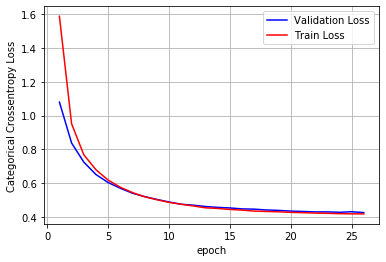

In [123]:
vy = model_2.history.history['val_loss'][0:26]
ty = model_2.history.history['loss'][0:26]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,26+1))
plt_dynamic(x, vy, ty, ax)

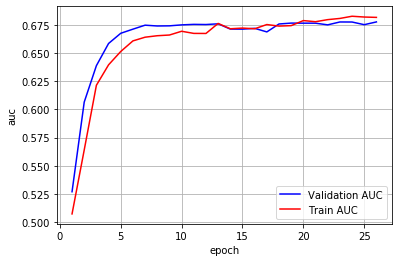

In [124]:
vy = model_2.history.history['val_auroc'][0:26]
ty = model_2.history.history['auroc'][0:26]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('auc')
# list of epoch numbers
x = list(range(1,26+1))
plt_dynamic1(x, vy, ty, ax)

In [125]:
result=model_2.evaluate([X_test_padded_docs,X_test_ss_le,X_test_pgc_le,X_test_psc_le,X_test_pss_le,X_test_tp_le,nf_test],y_test,batch_size=100)

21850/21850 [==============================] - 48s 2ms/step


In [126]:
result

[0.41455129505022165, 0.8525858089089121, 0.6722327852843579]

In [127]:
print('test',model_2.metrics_names[0],'is',result[0])
print('test',model_2.metrics_names[1],'is',result[1])
print('test',model_2.metrics_names[2],'is',result[2])

test loss is 0.41455129505022165
test acc is 0.8525858089089121
test auroc is 0.6722327852843579


<img src='https://i.imgur.com/V0dVtEG.png'>
ref: https://i.imgur.com/V0dVtEG.png

In [0]:
t=Tokenizer()
t.fit_on_texts(X_train['essay'].values)

X_train_encoded_docs = t.texts_to_sequences(X_train['essay'].values)
X_cv_encoded_docs = t.texts_to_sequences(X_cv['essay'].values)
X_test_encoded_docs = t.texts_to_sequences(X_test['essay'].values)

X_train_padded_docs = pad_sequences(X_train_encoded_docs, maxlen=300, padding='post')
X_cv_padded_docs = pad_sequences(X_cv_encoded_docs, maxlen=300, padding='post')
X_test_padded_docs = pad_sequences(X_test_encoded_docs, maxlen=300, padding='post')

In [0]:
vocab_size = len(t.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
X_train_tp_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_tp_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_tp_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

vectorizer.fit(X_train['school_state'].values)
X_train_ss_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_ss_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_ss_ohe = vectorizer.transform(X_test['school_state'].values)

vectorizer.fit(X_train['project_grade_category'].values)
X_train_pgc_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_pgc_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_pgc_ohe = vectorizer.transform(X_test['project_grade_category'].values)

vectorizer.fit(X_train['project_subject_categories'].values)
X_train_psc_ohe = vectorizer.transform(X_train['project_subject_categories'].values)
X_cv_psc_ohe = vectorizer.transform(X_cv['project_subject_categories'].values)
X_test_psc_ohe = vectorizer.transform(X_test['project_subject_categories'].values)

vectorizer.fit(X_train['project_subject_subcategories'].values)
X_train_pss_ohe = vectorizer.transform(X_train['project_subject_subcategories'].values)
X_cv_pss_ohe = vectorizer.transform(X_cv['project_subject_subcategories'].values)
X_test_pss_ohe = vectorizer.transform(X_test['project_subject_subcategories'].values)

In [0]:
from scipy.sparse import hstack
ott_data_train=hstack([X_train_tp_ohe,X_train_ss_ohe,X_train_pgc_ohe,X_train_psc_ohe,X_train_pss_ohe,nf_train])
ott_data_cv=hstack([X_cv_tp_ohe,X_cv_ss_ohe,X_cv_pgc_ohe,X_cv_psc_ohe,X_cv_pss_ohe,nf_cv])
ott_data_test=hstack([X_test_tp_ohe,X_test_ss_ohe,X_test_pgc_ohe,X_test_psc_ohe,X_test_pss_ohe,nf_test])

In [0]:
ott_data_train1=ott_data_train.todense()
ott_data_cv1=ott_data_cv.todense()
ott_data_test1=ott_data_test.todense()

In [0]:
ott_data_train1=ott_data_train1[:,:,np.newaxis]
ott_data_cv1=ott_data_cv1[:,:,np.newaxis]
ott_data_test1=ott_data_test1[:,:,np.newaxis]

In [138]:
from keras.layers import Conv1D
total_text_data=Input(shape=(len(X_train_padded_docs[0]),), name='total_text_data')
emb_text_data=Embedding(vocab_size,300,weights=[embedding_matrix],input_length=len(X_train_padded_docs[0]),trainable=False)(total_text_data)
emb_text_data = SpatialDropout1D(0.3)(emb_text_data)
emb_text_data = CuDNNLSTM(256,return_sequences=True)(emb_text_data)
flatten = Flatten()(emb_text_data)

otherthan_text_data=Input(shape=(ott_data_train.shape[1],1), name='otherthan_text_data')
conv1d1=Conv1D(64, 3,strides=1)(otherthan_text_data)
conv1dn=Conv1D(64, 3,strides=1)(conv1d1)

flatten_1=Flatten()(conv1dn)

concat=[]
concat.append(flatten)
concat.append(flatten_1)
concatenate=Concatenate()(concat)


dense_layer1_after_concat=Dense(300,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concatenate)
dropout=Dropout(0.4)(dense_layer1_after_concat)
dense_layer2_after_concat=Dense(256,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(dropout)
dropout_1=Dropout(0.5)(dense_layer2_after_concat)
bn=BatchNormalization()(dropout_1)
dense_layern_after_concat=Dense(128,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(bn)
dense_layern_after_concat=Dropout(0.6)(dense_layern_after_concat)
output_layer_to_classify_with_soft_max=Dense(2,activation='softmax')(dense_layern_after_concat)

model_3=Model(inputs=[total_text_data,otherthan_text_data],outputs=output_layer_to_classify_with_soft_max)

model_3.compile(loss='binary_crossentropy',optimizer=keras.optimizers.adam(lr=0.001,decay = 1e-4),metrics=['accuracy', auroc])

model_3.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
total_text_data (InputLayer)    (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_20 (Embedding)        (None, 300, 300)     14233800    total_text_data[0][0]            
__________________________________________________________________________________________________
otherthan_text_data (InputLayer (None, 498, 1)       0                                            
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 300, 300)     0           embedding_20[0][0]               
____________________________________________________________________________________________

In [139]:
filepath='weights_copy.best3.hdf5'
checkpoint_3 = ModelCheckpoint(filepath, monitor='val_auroc', verbose=1, save_best_only=True, mode='max')
tbc=TensorBoardColab()
cbl3 = [checkpoint_3,TensorBoardColabCallback(tbc)]
model_3.fit([X_train_padded_docs,ott_data_train1],y_train,epochs=20,batch_size=256,validation_data=([X_cv_padded_docs,ott_data_cv1],y_cv),verbose=1,callbacks=cbl3,class_weight = 'balanced')

Wait for 8 seconds...
TensorBoard link:
https://5a2832a8.ngrok.io
Train on 69918 samples, validate on 17480 samples
Epoch 1/20
69918/69918 [==============================] - 62s 891us/step - loss: 0.7738 - acc: 0.7956 - auroc: 0.5264 - val_loss: 0.6763 - val_acc: 0.8441 - val_auroc: 0.3634

Epoch 00001: val_auroc improved from -inf to 0.36337, saving model to weights_copy.best3.hdf5
Epoch 2/20
69918/69918 [==============================] - 62s 885us/step - loss: 0.5761 - acc: 0.8466 - auroc: 0.6192 - val_loss: 0.5962 - val_acc: 0.8441 - val_auroc: 0.7171

Epoch 00002: val_auroc improved from 0.36337 to 0.71706, saving model to weights_copy.best3.hdf5
Epoch 3/20
69918/69918 [==============================] - 62s 892us/step - loss: 0.5115 - acc: 0.8483 - auroc: 0.7007 - val_loss: 0.5128 - val_acc: 0.8441 - val_auroc: 0.7468

Epoch 00003: val_auroc improved from 0.71706 to 0.74681, saving model to weights_copy.best3.hdf5
Epoch 4/20
69918/69918 [==============================] - 62s 893us/

In [0]:
model_3.load_weights('weights_copy.best3.hdf5')

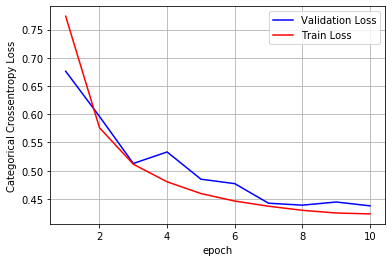

In [143]:
vy = model_3.history.history['val_loss'][0:10]
ty = model_3.history.history['loss'][0:10]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,10+1))
plt_dynamic(x, vy, ty, ax)

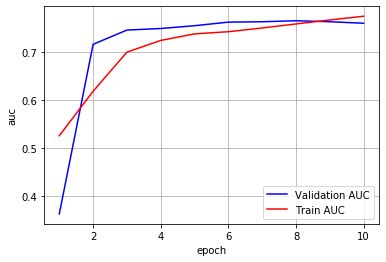

In [144]:
vy = model_3.history.history['val_auroc'][0:10]
ty = model_3.history.history['auroc'][0:10]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('auc')
# list of epoch numbers
x = list(range(1,10+1))
plt_dynamic1(x, vy, ty, ax)

In [145]:
result=model_3.evaluate([X_test_padded_docs,ott_data_test1],y_test,batch_size=100)

21850/21850 [==============================] - 8s 345us/step


In [146]:
result

[0.4347735852071295, 0.8580320362913799, 0.7550935333498481]

In [147]:
print('test',model_3.metrics_names[0],'is',result[0])
print('test',model_3.metrics_names[1],'is',result[1])
print('test',model_3.metrics_names[2],'is',result[2])

test loss is 0.4347735852071295
test acc is 0.8580320362913799
test auroc is 0.7550935333498481


<img src='https://i.imgur.com/309NmTO.png'>
ref: https://i.imgur.com/309NmTO.png

### Results

In [148]:
from prettytable import PrettyTable
rs=PrettyTable()
rs.field_names=['model','train_auc','cv_auc','test_auc']
rs.add_row(['model_1','0.7272','0.7497','0.73336'])
rs.add_row(['model_2','0.6817','0.6777','0.672233'])
rs.add_row(['model_3','0.7596','0.7662','0.7551'])

print(rs)

+---------+-----------+--------+----------+
|  model  | train_auc | cv_auc | test_auc |
+---------+-----------+--------+----------+
| model_1 |   0.7272  | 0.7497 | 0.73336  |
| model_2 |   0.6817  | 0.6777 | 0.672233 |
| model_3 |   0.7596  | 0.7662 |  0.7551  |
+---------+-----------+--------+----------+


### Conclusion

We were able to produce good auc results for each of the above models. We incorporated dropouts, batch normalization and modifying dimensions in hidden layers to produce the required result.